In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.shape

(1000, 10)

In [4]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_7596/2975651719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


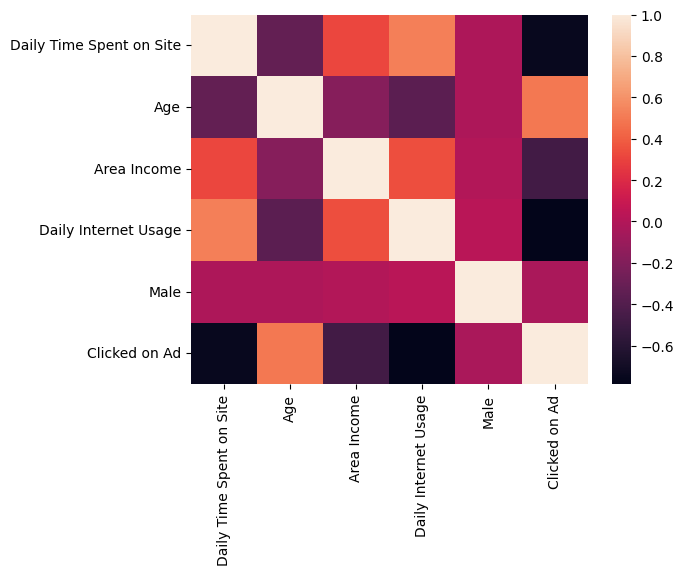

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
book = []

for i in df['Ad Topic Line']:
    i = i.split(" ")
    for j in i:
        book.append(j)

print(len(book))

book = pd.DataFrame(np.array(book))

freq = dict(book[0].value_counts())

emptyColumns = []

for i in freq.keys():
    emptyColumns.append(pd.Series([0]*1000))

emptyDF = pd.DataFrame(emptyColumns)
emptyDF = emptyDF.transpose()
emptyDF.columns = freq.keys()

for i in range(df.shape[0]):
    colWords = df.iloc[i, 4].split(" ")

    for j in colWords:
        emptyDF.loc[i, j] += 1

emptyDF.to_csv("vectorized_name.csv")

newDF = pd.concat([df, emptyDF], axis= 1)

print(newDF.shape)
newDF

3219
(1000, 329)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,...,Profit-focused,improvement,artificial,intelligence,functionalities,Persistent,static,Re-contextualized,process,matrices
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,...,0,0,0,0,0,0,0,0,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,...,0,0,0,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,...,0,0,0,0,0,0,0,0,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,...,0,0,0,0,0,0,0,0,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,...,0,0,0,0,0,0,0,0,0,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,...,0,0,0,0,0,0,0,0,0,0
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,...,0,0,0,0,0,0,0,0,0,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
emptyColumns = []

for i in range(6):
    emptyColumns.append(pd.Series([0]*1000))

emptyDF = pd.DataFrame(emptyColumns)
emptyDF = emptyDF.transpose()

for i in range(len(df['Timestamp'])):
    # print(i.split(' '))
    date, time = df.loc[i, ['Timestamp']][0].split(' ')
    lst = []
    for k in date.split('-'):
        lst.append(k)
    for k in time.split(':'):
        lst.append(k)
    # print(lst)
    for j in range(len(lst)):
        emptyDF.loc[i, j] = int(lst[j])
    # print(emptyDF.loc[i, :])

print(emptyDF)

emptyDF.columns = ['year', 'month', 'date', 'hours', 'min', 'sec']

        0  1   2   3   4   5
0    2016  3  27   0  53  11
1    2016  4   4   1  39   2
2    2016  3  13  20  35  42
3    2016  1  10   2  31  19
4    2016  6   3   3  36  18
..    ... ..  ..  ..  ..  ..
995  2016  2  11  21  49   0
996  2016  4  22   2   7   1
997  2016  2   1  17  24  57
998  2016  3  24   2  35  54
999  2016  6   3  21  43  21

[1000 rows x 6 columns]


In [9]:
newDF = pd.concat([df, emptyDF], axis= 1)

print(newDF.shape)
newDF

(1000, 16)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,year,month,date,hours,min,sec
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,27,0,53,11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,4,1,39,2
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,2016,3,13,20,35,42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2016,1,10,2,31,19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,2016,6,3,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,2016,2,11,21,49,0
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2016,4,22,2,7,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,2016,2,1,17,24,57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2016,3,24,2,35,54


In [10]:
import seaborn as sn
import matplotlib.pyplot as plt

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df = newDF.copy()
df.drop(['Ad Topic Line', 'Timestamp'], axis= 1, inplace= True)

In [13]:
lbl = LabelEncoder()

df['City'] = lbl.fit_transform(df['City'])
df['City']

0      961
1      903
2      111
3      939
4      805
      ... 
995    126
996    488
997    798
998    935
999    744
Name: City, Length: 1000, dtype: int64

In [14]:
df['Country'] = lbl.fit_transform(df['Country'])
df['Country']

0      215
1      147
2      184
3      103
4       96
      ... 
995    116
996     26
997    140
998     85
999     28
Name: Country, Length: 1000, dtype: int64

In [15]:
X = df.drop(['Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [16]:
(X.iloc[:, 1:7])

,Age,Area Income,Daily Internet Usage,City,Male,Country
0,35,61833.90,256.09,961,0,215
1,31,68441.85,193.77,903,1,147
2,26,59785.94,236.50,111,0,184
3,29,54806.18,245.89,939,1,103
4,35,73889.99,225.58,805,0,96
...,...,...,...,...,...,...
995,30,71384.57,208.58,126,1,116
996,45,67782.17,134.42,488,1,26
997,51,42415.72,120.37,798,1,140
998,19,41920.79,187.95,935,0,85


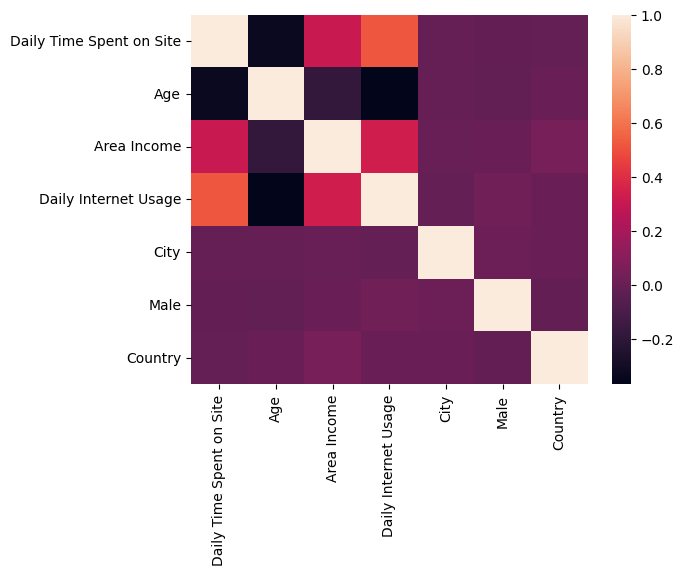

In [17]:
sn.heatmap(X.iloc[:, :7].corr())
plt.show()

In [18]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'City', 'Male', 'Country', 'Clicked on Ad',
       'year', 'month', 'date', 'hours', 'min', 'sec'],
      dtype='object')

In [19]:
from sklearn import datasets, linear_model, metrics

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

In [20]:
reg = linear_model.LogisticRegression(max_iter= 100000)
  
reg.fit(X_train, y_train)
 
y_pred = reg.predict(X_test)
  
print("Logistic Regression model accuracy(in %):",
metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 95.75


In [21]:
from sklearn.model_selection import cross_val_score

score_lr=cross_val_score(linear_model.LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[1.   0.97 0.97 0.95 0.98 0.99 0.98 0.95 0.97 0.95]
Avg : 0.9709999999999999
